In [213]:
import matplotlib.pyplot as plt
import numpy as np

Exercise a

In [214]:
def LCG(seed, a, c, m, num_values):
    x = []
    x.append(seed)

    for _ in range(num_values):
        next_number = (a * x[-1] + c) % m
        x.append(next_number)

    return x[1: ]

In [215]:
seed = 1
a = 1103515245
c = 12345
m = 2**31  # 2147483648

random_numbers = LCG(seed, a, c, m, 16)

print("Random numbers generated by LCG:")
for number in random_numbers:
    print(number)

Random numbers generated by LCG:
1103527590
377401575
662824084
1147902781
2035015474
368800899
1508029952
486256185
1062517886
267834847
180171308
836760821
595337866
790425851
2111915288
1149758321


In [216]:
def histogram_plot(data, number_bins):

    min_val = np.min(data)
    max_val = np.max(data)
    bin_width = (max_val - min_val) / number_bins

    bin_edges = [min_val + i * bin_width for i in range(number_bins + 1)]


    bin_counts = [0] * number_bins
    for value in data:
        if value == max_val:
            bin_counts[-1] += 1
        else:
            index = int((value - min_val) / bin_width)
            bin_counts[index] += 1

    for i in range(number_bins):
        plt.bar(
            x=bin_edges[i],
            height=bin_counts[i],
            width=bin_width,
            align='edge',
            edgecolor='black'
        )

    # Add labels
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

[1103527590, 377401575, 662824084, 1147902781, 2035015474, 368800899, 1508029952, 486256185, 1062517886, 267834847, 180171308, 836760821, 595337866, 790425851, 2111915288, 1149758321, 1644289366, 1388290519, 1647418052, 1675546029]


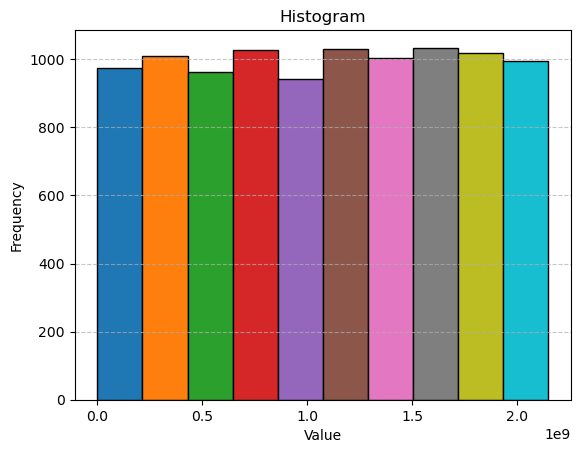

In [217]:
n_numbers = 10000
random_numbers = LCG(seed, a, c, m, n_numbers) # combination for bad one (1, 5, 1, 6, n_numbers)
print(random_numbers[:20])
histogram_plot(random_numbers, 10)

Exercise b

In [218]:
def correlation_scatter_plot(data):
    plt.figure()
    plt.scatter(data[:-1], data[1:])
    plt.xlabel("x(t)")
    plt.ylabel("x(t+1)")
    plt.title("Correlation Plot")
    plt.grid(True)
    plt.show()

<StemContainer object of 3 artists>

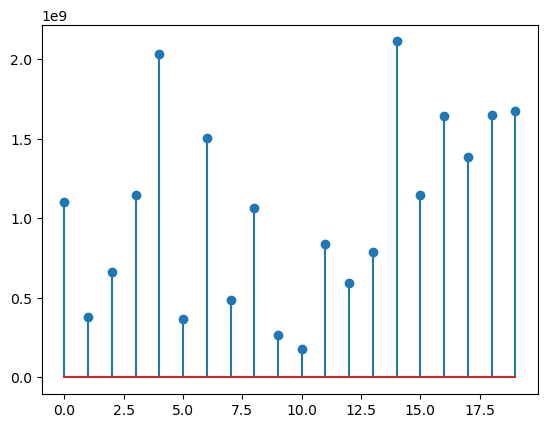

In [219]:
plt.figure()
plt.stem(random_numbers[:20])

In [220]:
import numpy as np

def T_chi_squared(data, num_bins):
    n_numbers = len(data)
    n_expected_class = n_numbers / num_bins

    min_val = min(data)
    max_val = max(data)
    bin_width = (max_val - min_val) / num_bins

    bin_counts = [0] * num_bins
    for value in data:
        if value == max_val:
            bin_counts[-1] += 1  # include the right edge
        else:
            index = int((value - min_val) / bin_width)
            bin_counts[index] += 1

    differences = np.array(bin_counts) - n_expected_class
    T = np.sum(differences**2 / n_expected_class)

    return T


In [221]:
print(T_chi_squared(random_numbers, 10))

8.836


In [222]:
from scipy.stats import chi2

def chi_squared_test(data, num_bins):
    T = T_chi_squared(data, num_bins)
    df = num_bins - 1  # degrees of freedom
    p_value = 1 - chi2.cdf(T, df)
    return T, df, p_value


In [223]:
T, df, p_value = chi_squared_test(random_numbers, 10)
print(p_value)

0.4525486489437661


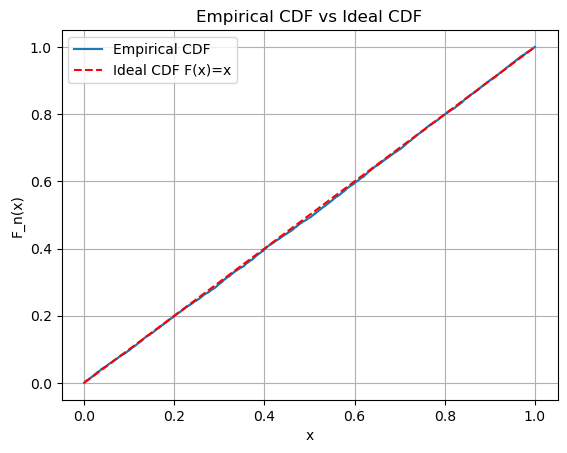

p-value: 0.3895637462780686


In [224]:
from scipy.stats import kstwobign

def KS_test(data):

    data = (np.array(data) - np.min(data)) / (np.max(data) - np.min(data))
    
    data_sorted = sorted(data)

    n = len(data_sorted)
    empirical_cdf = np.arange(1, n + 1) / n

    Dn = np.max(np.abs(np.array(data_sorted)/max(data_sorted) - empirical_cdf))

    plt.step(data_sorted, empirical_cdf, where='post', label='Empirical CDF')
    plt.plot(data_sorted, np.array(data_sorted)/max(data_sorted), 'r--', label='Ideal CDF F(x)=x')  # Uniform CDF
    plt.xlabel('x')
    plt.ylabel('F_n(x)')
    plt.legend()
    plt.grid()
    plt.title('Empirical CDF vs Ideal CDF')
    plt.show()

    # Kolmogorov distribution (asymptotic, valid for large n)
    lambda_val = np.sqrt(n) * Dn
    p_value = kstwobign.sf(lambda_val)  # sf = 1 - cdf

    print(f"p-value: {p_value}")

KS_test(random_numbers)

In [225]:
def correlation_test(data, m, h):

    U = np.array(data) / m
    n = len(U)
    
    ch = np.sum(U[:n - h] * U[h:]) / (n - h)

    mu = 0.25
    sigma = np.sqrt(7 / (144 * n))

    # Compute z-score
    z = (ch - mu) / sigma

    print(f"Estimated correlation c_{h} = {ch}")
    print(f"z-score = {z}")

    return ch, z

In [226]:
c_1 = correlation_test(random_numbers, m, 1)
c_2 = correlation_test(random_numbers, m, 2)
c_4 = correlation_test(random_numbers, m, 4)


Estimated correlation c_1 = 0.25240945756621486
z-score = 1.092827231102992
Estimated correlation c_2 = 0.2539392146591046
z-score = 1.7866598312384192
Estimated correlation c_4 = 0.2514497151724761
z-score = 0.6575289974140953


Exercise 2

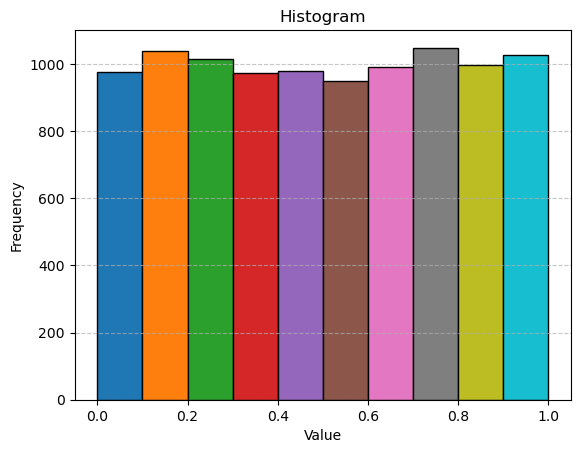

0.4404186068489936


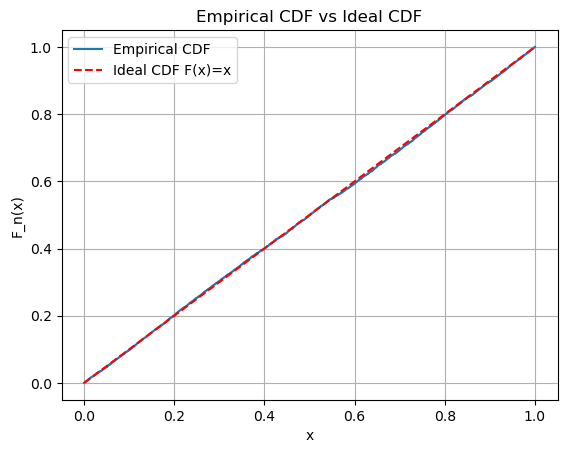

p-value: 0.5174078073950199
Estimated correlation c_1 = 5.450116406838332e-20
z-score = -113.38934190276817
Estimated correlation c_2 = 5.424456421256601e-20
z-score = -113.38934190276817
Estimated correlation c_4 = 5.451804883637415e-20
z-score = -113.38934190276817


In [232]:
random_numbers = np.random.rand(n_numbers)
histogram_plot(random_numbers, 10)
T, df, p_value = chi_squared_test(random_numbers, 10)
print(p_value)
KS_test(random_numbers)
c_1 = correlation_test(random_numbers, m, 1)
c_2 = correlation_test(random_numbers, m, 2)
c_4 = correlation_test(random_numbers, m, 4)